In [ ]:
import keras
from PIL import Image
import cv2

In [ ]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.applications import VGG16
import numpy as np
from numpy import asarray

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
files=os.listdir("/content/drive/My Drive/Masked Generated Images")
i=0
for f in files:
    if f.endswith(".jpg"):
        i+=1
print(i)

5025


In [ ]:
classes={0:'Mask',1:'Without Mask'}

In [ ]:
#Making Numpy array of the dataset
X=[]#for storing image matrix
Y=[]#for storing output class/label
i=0
files=os.listdir("/content/drive/My Drive/Masked Generated Images")

for f in files:
  if(f.endswith(".jpg")):
    data=cv2.imread("/content/drive/My Drive/Masked Generated Images/"+f)
    X.append(data)
    Y.append(0)#class

    print(i)#just for examining purpose
    i+=1

Streaming output truncated to the last 5000 lines.
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281

In [ ]:
X=np.array(X)
X.shape

(5025, 224, 224, 3)

In [ ]:
X=list(X)
i=0
files=os.listdir("/content/drive/My Drive/Without Mask Generated Images")

for f in files:
  if(f.endswith(".jpg")):
    data=cv2.imread("/content/drive/My Drive/Without Mask Generated Images/"+f)
    X.append(data)
    Y.append(1)#class 1

    print(i)#just for examining purpose
    i+=1

Streaming output truncated to the last 5000 lines.
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
9

(10695, 224, 224, 3)

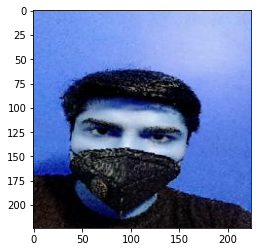

In [ ]:
import matplotlib.pyplot as plt
X=np.array(X)
Y=np.array(Y)
plt.imshow(X[5000])
X.shape

In [ ]:
#shuffling data
data_num = len(Y)#no of data points
random_index = np.random.permutation(data_num)#generating random index

X_shuffle = []
Y_shuffle = []
for i in range(data_num):
    X_shuffle.append(X[random_index[i]])
    Y_shuffle.append(Y[random_index[i]])
    
X = np.array(X_shuffle) 
Y = np.array(Y_shuffle)

1


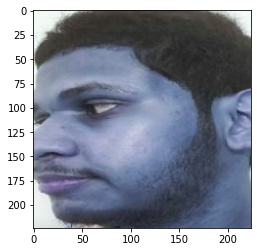

In [ ]:
#Splitting data
import sklearn
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train.shape
plt.imshow(X_train[0])
print(Y_train[0])

In [ ]:
from keras.layers import Dropout, Dense, Flatten, Conv2D
from keras import optimizers
from keras import Model

In [ ]:
#Making model
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
#freezing first 5 layers
i=0
for layer in base_model.layers:
    layer.trainable=False
    i+=1
    if(i==5):
      break

for layer in base_model.layers:  
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
#adding layers and making model
add_model=Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
#add_model.add(Dense(2048,activation='relu'))
add_model.add(Dense(512, activation='relu'))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(1, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=3,batch_size=32,validation_split=0.1,shuffle=True)

Train on 6737 samples, validate on 749 samples
Epoch 1/3
6737/6737 [==============================] - 155s 23ms/step - loss: 0.6939 - accuracy: 0.5324 - val_loss: 0.6637 - val_accuracy: 0.6529
Epoch 2/3
6737/6737 [==============================] - 139s 21ms/step - loss: 0.2975 - accuracy: 0.8525 - val_loss: 0.0433 - val_accuracy: 0.9826
Epoch 3/3
6737/6737 [==============================] - 139s 21ms/step - loss: 0.0563 - accuracy: 0.9822 - val_loss: 0.0247 - val_accuracy: 0.9893


In [ ]:
#Making predictions
model.evaluate(X_test,Y_test)

3209/3209 [==============================] - 30s 9ms/step


[0.030874913683248958, 0.9906513094902039]

[[0.]]
Mask


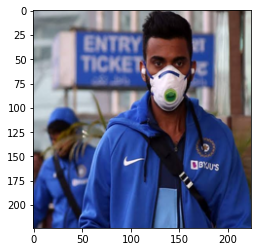

In [ ]:
#checking purpose
img=Image.open("/content/drive/My Drive/Rahul.jpg")
img=img.resize((224,224))
data=asarray(img)
plt.imshow(data)
data.shape=(1,)+data.shape
ans=model.predict(data)
print(ans)
if(ans<=0.5):
    print("Mask")
else:
  print("Without Mask")